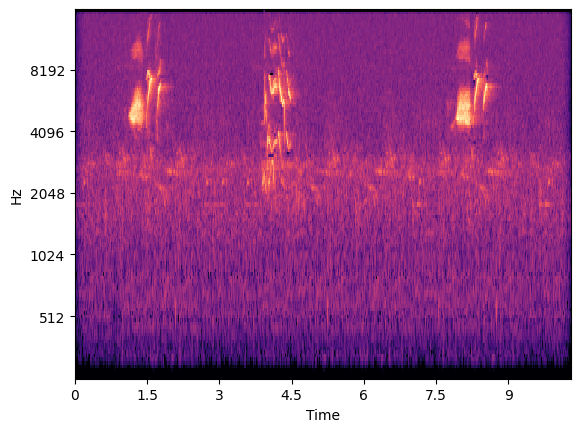

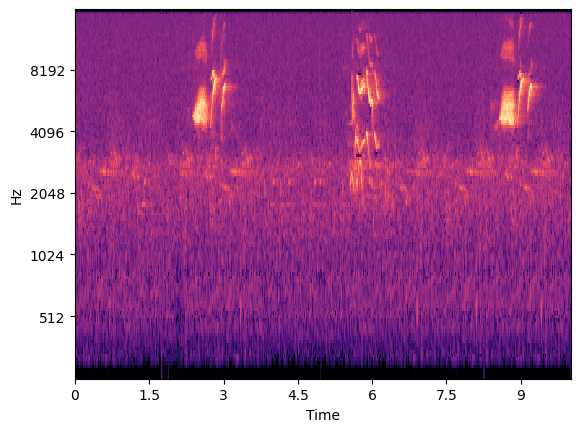

In [1]:
#import tensorflow as tf
import numpy as np
#import scipy as sp
#import sklearn as skl
import matplotlib.pyplot as plt
import pandas as pd
#import pickle
#import math
import os
import glob
import librosa as lba
import librosa.display as lid
import soundfile as sf
import random
from pathlib import Path
from tensorflow import keras
#from keras import layers
#from keras import models
#from keras import regularizers
#from sklearn.model_selection import train_test_split
#from sklearn.cluster import KMeans
#from sklearn.metrics import silhouette_score
from datetime import datetime#, date, timedelta
from numpy.random import default_rng
#from keras.layers import Dense, Concatenate, Input, Lambda
#from keras.models import Model

WORKING_DIRECTORY = 'C:/BirdCLEF23/'
os.chdir (WORKING_DIRECTORY)

DIR_DATA = "C:/BirdCLEF23/data"
SR = 32000
SEED = 2276
rng = default_rng (SEED)
np.random.seed (SEED)
random.seed (SEED)
os.environ['PYTHONHASHSEED'] = str(SEED)


fpLog  = Path ('./logs/log whhsaw1.txt')

with open (fpLog, 'w') as flog:
    print ('whhsaw1.ipynb has started at : ', datetime.now(), file = flog)

BIRD = 'whhsaw1'
DIR_AUDIO = './data/train_audio/'
DIR_SAMPLE = './config 264b v2.0/rare/whhsaw1/'
lini = [fname.replace ('\\', '/').replace ('//', '/') for fname in glob.glob (f'{DIR_AUDIO}/{BIRD}/*.*')]

# whhsaw1/XC704863.ogg

fname = f'{DIR_AUDIO}/whhsaw1/XC289267.ogg'
nax, _ = lba.load (fname, sr = SR, res_type = "kaiser_fast", mono = True)
nax = nax[int (0.05*SR) : nax.shape[0] - int (0.05*SR)]

spec = lba.feature.melspectrogram (y = nax, sr=SR, n_mels = 128, n_fft = 1024, hop_length = 400, fmax = 16000, fmin = 20)
spec = lba.power_to_db (spec, ref = np.max)
lid.specshow (spec, sr = SR, hop_length = 400, n_fft = 1024, fmin = 20, fmax = 16000, x_axis = 'time', y_axis = 'mel')
plt.show()

# enlarging the initial audio to 50 sec

f00 = f'{DIR_SAMPLE}/XC289267M0.wav'
_nax_01 = np.concatenate ([nax[int (0.6*SR) : int (3.7*SR)], nax[int (0.2*SR) : int (0.7*SR)]])
_nax_02 = np.concatenate ([nax[int (3.7*SR) : int (7.5*SR)], nax[int (0.5*SR) : int (1.0*SR)]])
_nax_03 = np.concatenate ([nax[int (7.5*SR) - nax.shape[0] : - int (0.1*SR)], nax[int (1.0*SR) : int (1.5*SR)]])

lnum = [0, 1, 2]
lnax = [_nax_01, _nax_02, _nax_03]
lmargin = [int(0.8*SR), int(1.5*SR), int(0.8*SR)]
lres = random.choices (lnum, k = 30)

lres = [lnax[x][rng.integers (0, int (0.1*SR)) : lnax[x].shape[0] - rng.integers (0, lmargin[x])] for x in lres]

_nax_ = np.concatenate (lres)

_spec_ = lba.feature.melspectrogram (y = _nax_[60*SR: 70*SR], sr=SR, n_mels = 128, n_fft = 1024, hop_length = 400, fmax = 16000, fmin = 20)
_spec_ = lba.power_to_db (_spec_, ref = np.max)
lid.specshow (_spec_, sr = SR, hop_length = 400, n_fft = 1024, fmin = 20, fmax = 16000, x_axis = 'time', y_axis = 'mel')
plt.show()

sf.write (f00, _nax_, SR)

with open (fpLog, 'a') as flog:
    print ('whhsaw1.ipynb has finished at : ', datetime.now(), file = flog)
